# Image Transformation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import invert
from skimage.color import rgb2gray
from skimage.filters import sobel, gaussian
from skimage.exposure import rescale_intensity
from skimage import io, data, img_as_ubyte, img_as_float

## 1. Image Representation


In [2]:
img = data.astronaut()
print(img[250:260, 250:260])

[[[ 41  41  25]
  [ 16  17   5]
  [ 16  15   9]
  [  0   0   0]
  [  0   0   1]
  [  0   0   0]
  [  0   0   0]
  [  1   0   1]
  [  4   2   1]
  [ 15  11  12]]

 [[ 65  63  59]
  [ 46  43  40]
  [ 19  18   9]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  2   1   1]
  [  2   1   1]
  [  8   7   4]]

 [[ 69  66  61]
  [ 53  51  48]
  [ 27  27  17]
  [  2   1   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  2   1   1]
  [  3   1   2]
  [ 10   6   4]]

 [[ 62  61  64]
  [ 34  34  32]
  [ 10  11   5]
  [  2   1   1]
  [  0   0   0]
  [  0   0   0]
  [  1   1   1]
  [  3   1   1]
  [  3   1   2]
  [ 12   8   5]]

 [[ 56  56  60]
  [ 31  30  28]
  [ 11  12   7]
  [  2   3   2]
  [  0   0   0]
  [  2   1   2]
  [  6   5   2]
  [  4   2   1]
  [  3   2   1]
  [  9   7   2]]

 [[ 45  44  40]
  [ 29  28  25]
  [  9   8   6]
  [  1   2   0]
  [  5   4   3]
  [ 18  15   8]
  [ 16  12   5]
  [  8   6   2]
  [  7   4   1]
  [  9   5   2]]

 [[ 39  39  38]
  [ 28  28  

Multiply the number within array

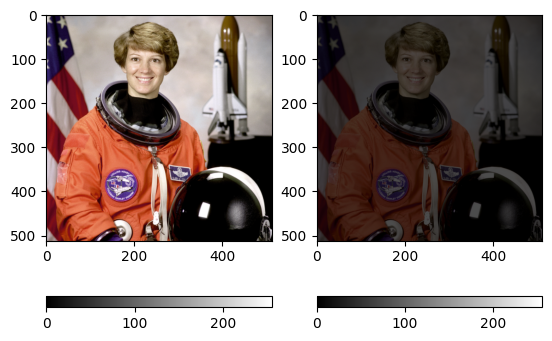

In [3]:
img = data.astronaut()
imf = 0.3 * img
imf = imf.astype(np.uint8)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(img, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imf, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

## 2. Mix

(512, 512)
(512, 512)


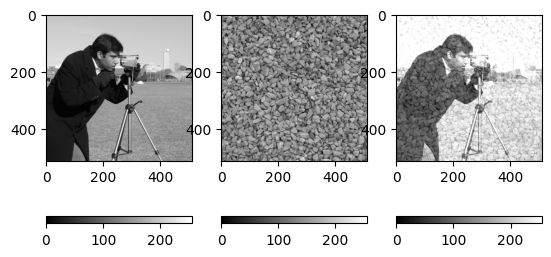

In [4]:
img_cam = data.camera()
img_grav = data.gravel()

print(img_cam.shape)
print(img_grav.shape)

# Make sure both images are the same size
im = img_cam.astype(float) + 0.5 * img_grav.astype(float)

fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
p = plt.imshow(img_cam, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)
ax = fig.add_subplot(1, 3, 2)
p = plt.imshow(img_grav, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)
ax = fig.add_subplot(1, 3, 3)
p = plt.imshow(im, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)




## 3. Addition

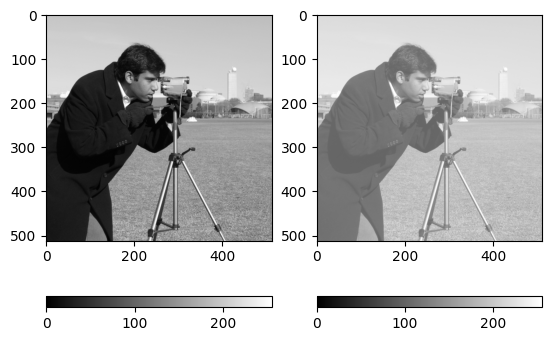

In [ ]:
img = data.camera()
c = 100
imf = (rescale_intensity(img, out_range=(c, 255))).astype(np.uint8)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(img, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imf, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

## 4. Blending

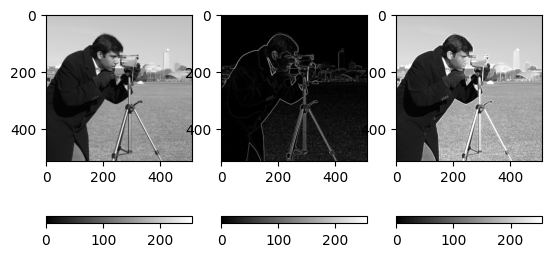

In [9]:
img = data.camera()
img_1 = sobel(img)
ima = rescale_intensity(img_1, out_range=(0, 255))
imb = img + ima
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
p = plt.imshow(img, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)
ax = fig.add_subplot(1, 3, 2)
p = plt.imshow(ima, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)
ax = fig.add_subplot(1, 3, 3)
p = plt.imshow(imb, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

### Substraction

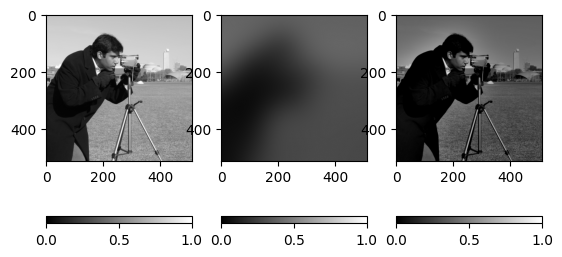

In [10]:
im0 = img_as_float(data.camera())
im1 = gaussian(im0, sigma=50)/2
ims = im0 - im1
ims[ims<0] = 0
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
p = plt.imshow(im0, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 1)
ax = fig.add_subplot(1, 3, 2)
p = plt.imshow(im1, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 1)
ax = fig.add_subplot(1, 3, 3)
p = plt.imshow(ims, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 1)

## 5. Subtraction - move

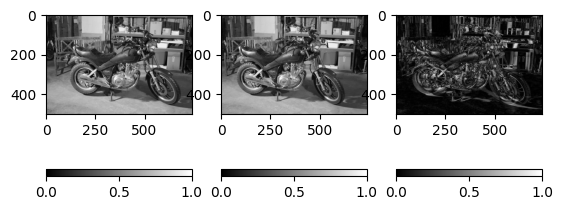

In [11]:
im0, im1, _ = data.stereo_motorcycle()
im0 = rgb2gray(im0)
im1 = rgb2gray(im1)
ims = np.abs(im0 - im1)
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
p = plt.imshow(im0, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 1)

ax = fig.add_subplot(1, 3, 2)
p = plt.imshow(im1, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 1)

ax = fig.add_subplot(1, 3, 3)
p = plt.imshow(ims, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 1)

## 6. Division

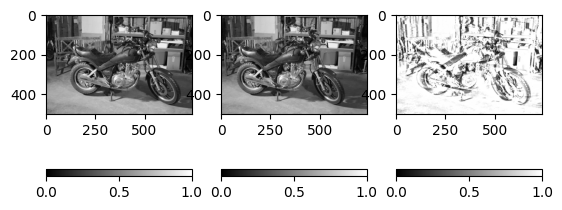

In [12]:
im0, im1, _ = data.stereo_motorcycle()
im0 = rgb2gray(im0)
im1 = rgb2gray(im1)
im0 = img_as_float(im0)
im1 = img_as_float(im1)
imd = np.zeros_like(im0)
imd[im1!=0] = im0[im1!=0] / im1[im1!=0]
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
p = plt.imshow(im0, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 1)

ax = fig.add_subplot(1, 3, 2)
p = plt.imshow(im1, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 1)

ax = fig.add_subplot(1, 3, 3)
p = plt.imshow(imd, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 1)

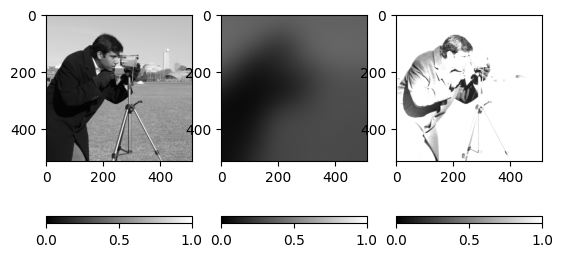

In [14]:
im0 = img_as_float(data.camera())
im1 = gaussian(im0, sigma=50)/2
imd = np.zeros_like(im0)
imd[im1!=0] = im0[im1!=0] / im1[im1!=0]
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
p = plt.imshow(im0, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 1)

ax = fig.add_subplot(1, 3, 2)
p = plt.imshow(im1, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 1)

ax = fig.add_subplot(1, 3, 3)
p = plt.imshow(imd, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 1)

## 7. Multiplication

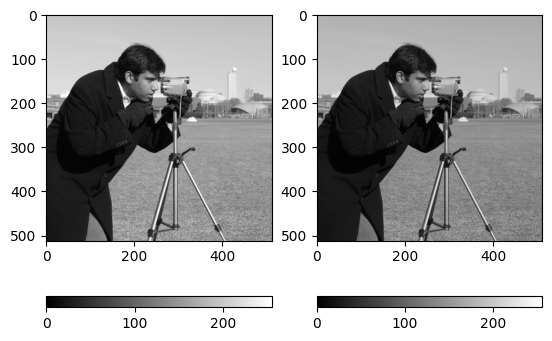

In [15]:
im = data.camera()
imm = 0.3 * im
imm = 3 * imm
imm = imm.astype(np.uint8)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)
ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imm, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

### - NOT

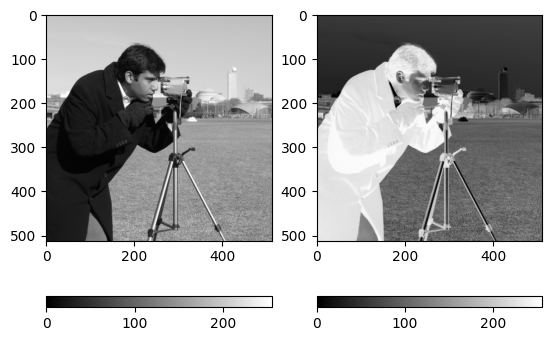

In [16]:
im = data.camera()
imn = invert(im)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(im, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imn, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

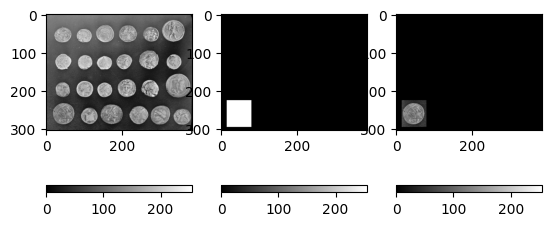

In [17]:
im = data.coins()
imm = np.zeros_like(im)
imm[225:295,15:80] = 255
ima = im.copy()
ima[imm==0] = 0
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
p = plt.imshow(im, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)
ax = fig.add_subplot(1, 3, 2)
p = plt.imshow(imm, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)
ax = fig.add_subplot(1, 3, 3)
p = plt.imshow(ima, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

## 9 OR

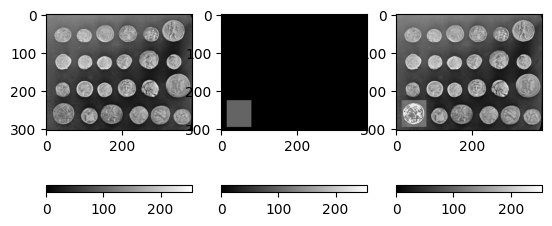

In [18]:
im = data.coins()
imm = np.zeros_like(im)
imm[225:295,15:80] = 100
imor = np.bitwise_or(im, imm)
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
p = plt.imshow(im, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)
ax = fig.add_subplot(1, 3, 2)
p = plt.imshow(imm, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)
ax = fig.add_subplot(1, 3, 3)
p = plt.imshow(imor, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)

## 10 XOR

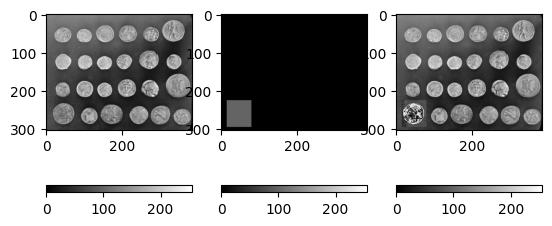

In [19]:
im = data.coins()
imm = np.zeros_like(im)
imm[225:295,15:80] = 100
imxor = np.bitwise_xor(im, imm)
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
p = plt.imshow(im, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)
ax = fig.add_subplot(1, 3, 2)
p = plt.imshow(imm, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)
ax = fig.add_subplot(1, 3, 3)
p = plt.imshow(imxor, cmap='gray')
c = plt.colorbar(orientation='horizontal')
plt.clim(0, 255)